python не был бы так популярен, если бы не библиотеки, расширяющие его функционал для выполнения практически любых задач. В рамках нашей специальности, нам нужно осваивать библиотеки для быстрых операций с массивами данных, построения математических моделей и их оптимизаций и визуализации некоторых материалов.

Этот раздел будет построен следующим образом:

Будет максимально короткое знакомство с библиотекой по типу:

1. Представление
2. 2 - 3 примера использования

Далее перейдем к решению практических задач и исследований, в ходе которых будем обращаться ко всем инструментам python и таким образом осваивая их.

Приведем краткий список тех библиотек, которые будут необходимы:
1. numpy - https://numpy.org/
2. pandas - https://pandas.pydata.org/
3. matplotlib - https://matplotlib.org/
4. sklearn - https://scikit-learn.org/stable/index.html
5. scipy - https://scipy.org/
6. statsmodels - https://www.statsmodels.org/stable/index.html
7. torch - https://pytorch.org/
8. jax - https://docs.jax.dev/en/latest/quickstart.html
9. polars - https://pola.rs/
10. plotly - https://plotly.com/

##### TORCH

torch -- https://docs.pytorch.org/docs/stable/index.html
torch библиотека для работы с тензорами. Главное преимущество и идея torch -- это поддержка автоматического дифференцирования, которая позволяет создавать сложные нейронные сети

Базовый тензор: tensor([1., 2., 3., 4., 5.])
Тензор из списка:
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Нулевой тензор:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
Единичный тензор:
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Случайный тензор:
 tensor([[-0.0204,  0.6574, -0.9968],
        [ 1.9270,  0.8834,  0.7740]])
Сложение: tensor([5., 7., 9.])
Умножение: tensor([ 4., 10., 18.])
Матричное умножение: tensor(32.)
Измененная форма:
 tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

Начальное значение x: 2.0
f(x) = 11.0
df/dx = 7.0

=== Минимизация функции методом градиентного спуска ===

Минимум найден в точке x = 2.0005


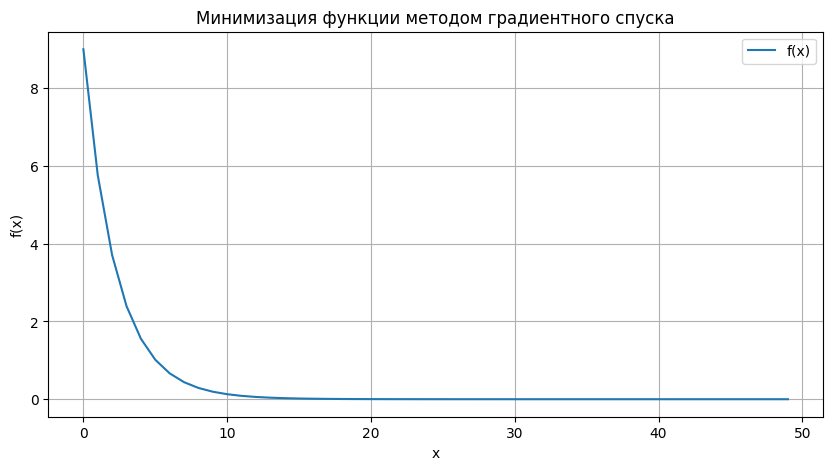

In [5]:
# пример создания тензора и его использования

import torch
import matplotlib.pyplot as plt

# создаем тензор
# так же важно указывать тип данных, иначе будет использоваться float64
tensor: torch.Tensor = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
print("Базовый тензор:", tensor)

# создаем тензор из списка
list_tensor: torch.Tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
print("Тензор из списка:\n", list_tensor)

# создаем тензоры разных размерностей
zeros: torch.Tensor = torch.zeros(3, 3, dtype=torch.float32)
ones: torch.Tensor = torch.ones(2, 4, dtype=torch.float32)
random_tensor: torch.Tensor = torch.randn(2, 3, dtype=torch.float32)
print("Нулевой тензор:\n", zeros)
print("Единичный тензор:\n", ones)
print("Случайный тензор:\n", random_tensor)

# базовые операции с тензорами
a: torch.Tensor = torch.tensor([1, 2, 3], dtype=torch.float32)
b: torch.Tensor = torch.tensor([4, 5, 6], dtype=torch.float32)
print("Сложение:", a + b)
print("Умножение:", a * b)
print("Матричное умножение:", torch.matmul(a, b))

# изменение формы тензора
# замечание: view и reshape -- одно и то же,
# но view возвращает новый тензор с измененной формой, а reshape изменяет тензор на месте
reshaped: torch.Tensor = tensor.view(5, 1)
print("Измененная форма:\n", reshaped)

# автоматическое дифференцирование (autograd)
x: torch.Tensor = torch.tensor(2.0, dtype=torch.float32, requires_grad=True)
print(f"\nНачальное значение x: {x}")

# определяем функцию f(x) = x^2 + 3x + 1
f: torch.Tensor = x**2 + 3*x + 1
print(f"f(x) = {f}")

# вычисляем градиент
f.backward()
print(f"df/dx = {x.grad}")

# пример минимизации функции методом градиентного спуска
print("\n=== Минимизация функции методом градиентного спуска ===")
x = torch.tensor(5.0, dtype=torch.float32, requires_grad=True)
learning_rate: float = 0.1
iterations: int = 50

for i in range(iterations):
    # функция f(x) = x^2 - 4x + 4 (минимум в x = 2)
    f = x**2 - 4*x + 4
    
    # вычисляем градиент
    f.backward()
    
    # обновляем x
    with torch.no_grad():
        x -= learning_rate * x.grad
        x.grad.zero_()
        learning_rate *= 0.99
    
    # print(f"Итерация {i+1}: x = {x.item():.4f}, f(x) = {f.item():.4f}")
    
    # Сохраняем значения для построения графика
    if i == 0:
        x_history = [x.item()]
        f_history = [f.item()]
    else:
        x_history.append(x.item())
        f_history.append(f.item())

print(f"\nМинимум найден в точке x = {x.item():.4f}")

plt.figure(figsize=(10, 5))
plt.plot(range(len(f_history)), f_history, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Минимизация функции методом градиентного спуска')
plt.legend()
plt.grid(True)
# plt.semilogy()
plt.show()


In [6]:
# рассмотрим данные с мосбиржи - аггрегированные потоки заявок и сделок. Проведем манипуляций и попытаемся что-нибудь найти

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import glob
from tqdm import tqdm

PATH_TO_DATA: str = '/home/dmitry/market_data/moex_features_unified/full/'

paths_to_data: list[str] = sorted(glob.glob(PATH_TO_DATA + '*.parquet'))
fields: list[str] = list(
    map(
        lambda x: x.split('/')[-1].removesuffix('.parquet'),
        sorted(paths_to_data)
    )
)
data: dict[str, pd.DataFrame] = dict()
for field, path in tqdm(zip(fields, paths_to_data)):
    assert field in path, 'this field is does not map the data!'
    data[field] = pd.read_parquet(path)['2024-01-01':'2025-01-01']

tickers_returns = data['trade_pr_vwap'].resample('5min').first().ffill().pct_change(fill_method=None).shift(-1)
tickers_returns = tickers_returns.where(tickers_returns.abs() < 0.075, 0)

# Calculate notna percentage and get valid tickers
notna = tickers_returns.notna().mean()
valid_tickers = notna[notna > 0.9].index

62it [00:01, 34.82it/s]


In [7]:
correlations: dict[str, pd.DataFrame] = dict()
cross_returns = tickers_returns[valid_tickers].shift(-2)
cross_returns = cross_returns.sub(cross_returns.mean(axis=1), axis=0)

for field, df in tqdm(data.items()):
    # считаем zscore, чтобы получить стационарный ряд
    zscore: pd.DataFrame = df.sub(df.ewm(12 * 24 * 1).mean()).div(df.ewm(12 * 24 * 1).std() + 1e-8)[valid_tickers]
    zscore = zscore.ewm(12 * 24).mean()
    # смотрим корреляцию с ретурнами
    correlations[field]: pd.DataFrame = zscore.corrwith(cross_returns, axis=1).median() # additional shift

sorted_features = dict(
    sorted(
        correlations.items(),
        key=lambda x: -x[1]
    )
)

100%|██████████| 62/62 [00:11<00:00,  5.33it/s]


In [8]:
# используем в качестве сигналов признаки которые имеют высокую корреляцию с ретурнами
alphas: dict[str, pd.DataFrame] = dict()

for feature in list(sorted_features.keys())[:10]:
    df = data[feature]
    zscore: pd.DataFrame = df.sub(df.ewm(12 * 24 * 1).mean()).div(df.ewm(12 * 24 * 1).std() + 1e-8)[valid_tickers] * sorted_features[feature]
    alphas[feature] = zscore.copy().ewm(12*24).mean()

In [9]:
# задача: реализовать оптимизацию портфеля с помощью градиентного спуска

import torch
import torch.nn as nn
import torch.optim as optim

torch.set_num_threads(12)

ccols, cidx = sorted(list(set.intersection(*[set(pf.columns.tolist()) for pf in alphas.values()]))), list(set.intersection(*[set(pf.index.tolist()) for pf in alphas.values()]))
portfolios: list[pd.DataFrame] = [pf.loc[cidx, ccols] for pf in alphas.values()]


In [13]:
# определим тензоры для портфеля
portfolios_tensor: torch.Tensor = torch.stack([torch.asarray(pf.values, dtype=torch.float32, requires_grad=False) for pf in portfolios], axis=0)
portfolios_tensor[torch.isnan(portfolios_tensor)] = 0

# определим веса и доходности
weights: torch.Tensor = torch.ones(portfolios_tensor.shape[0], dtype=torch.float32, requires_grad=True)

returns: torch.Tensor = torch.asarray(tickers_returns.loc[cidx, ccols].values, dtype=torch.float32, requires_grad=False)
returns[torch.isnan(returns)] = 0

# определим функции для построения портфеля и нормализации весов
def construct_portfolio(weights: torch.Tensor, portfolios_tensor: torch.Tensor) -> torch.Tensor:
    return (weights.unsqueeze(1).unsqueeze(1) * portfolios_tensor).sum(dim=0)

def renormalize_weights(pf: torch.Tensor) -> torch.Tensor:
    pf = pf - pf.mean(dim=-1, keepdim=True)
    pf = pf / (pf.abs().sum(dim=-1, keepdim=True) + 1e-32)
    return pf

# определим функцию для вычисления доходности портфеля
def get_portfolio_return(pf: torch.Tensor, returns: torch.Tensor) -> torch.Tensor:
    return (pf * returns).sum(dim=-1)

def sharpe_loss(pf: torch.Tensor, returns: torch.Tensor) -> torch.Tensor:
    pf_returns = get_portfolio_return(pf, returns)
    return -pf_returns.mean() / (pf_returns.std() + 1e-32)

In [14]:

# напишем оптимизацию портфеля с помощью градиентного спуска
N: int = 1_000
lr: float = 10

losses: list[float] = []

for i in tqdm(range(N)):
    pf = construct_portfolio(weights, portfolios_tensor)
    pf = renormalize_weights(pf)
    loss = sharpe_loss(pf, returns)
    loss.backward()
    weights.data -= lr * weights.grad
    # break
    weights.grad.zero_()

    losses.append(loss.item())

    if i % 50 == 0:
        print(f"Iteration {i}: Loss = {loss.item()}")



  0%|          | 4/1000 [00:00<00:33, 29.84it/s]

Iteration 0: Loss = -0.03620455041527748


  6%|▌         | 55/1000 [00:01<00:34, 27.50it/s]

Iteration 50: Loss = -0.044181469827890396


 10%|█         | 105/1000 [00:03<00:32, 27.83it/s]

Iteration 100: Loss = -0.047842107713222504


 15%|█▌        | 154/1000 [00:05<00:30, 27.60it/s]

Iteration 150: Loss = -0.05298716947436333


 20%|██        | 205/1000 [00:07<00:29, 26.94it/s]

Iteration 200: Loss = -0.08607590943574905


 26%|██▌       | 256/1000 [00:09<00:27, 26.82it/s]

Iteration 250: Loss = -0.08765000849962234


 30%|███       | 304/1000 [00:10<00:24, 28.33it/s]

Iteration 300: Loss = -0.09036300331354141


 36%|███▌      | 355/1000 [00:12<00:24, 25.98it/s]

Iteration 350: Loss = -0.08504900336265564


 40%|████      | 404/1000 [00:14<00:20, 28.52it/s]

Iteration 400: Loss = -0.09301858395338058


 46%|████▌     | 455/1000 [00:16<00:19, 28.64it/s]

Iteration 450: Loss = -0.093843013048172


 51%|█████     | 506/1000 [00:17<00:18, 26.22it/s]

Iteration 500: Loss = -0.09336226433515549


 56%|█████▌    | 556/1000 [00:19<00:15, 28.60it/s]

Iteration 550: Loss = -0.09293012320995331


 60%|██████    | 605/1000 [00:21<00:13, 29.29it/s]

Iteration 600: Loss = -0.09224402904510498


 66%|██████▌   | 656/1000 [00:23<00:12, 27.01it/s]

Iteration 650: Loss = -0.09255407750606537


 70%|███████   | 705/1000 [00:24<00:09, 29.74it/s]

Iteration 700: Loss = -0.09278344362974167


 76%|███████▌  | 756/1000 [00:26<00:08, 28.54it/s]

Iteration 750: Loss = -0.09297789633274078


 80%|████████  | 804/1000 [00:28<00:07, 26.60it/s]

Iteration 800: Loss = -0.0932147428393364


 86%|████████▌ | 855/1000 [00:30<00:06, 23.61it/s]

Iteration 850: Loss = -0.0934203565120697


 91%|█████████ | 906/1000 [00:32<00:03, 27.79it/s]

Iteration 900: Loss = -0.0934729054570198


 95%|█████████▌| 954/1000 [00:34<00:01, 26.52it/s]

Iteration 950: Loss = -0.09352974593639374


100%|██████████| 1000/1000 [00:35<00:00, 27.87it/s]


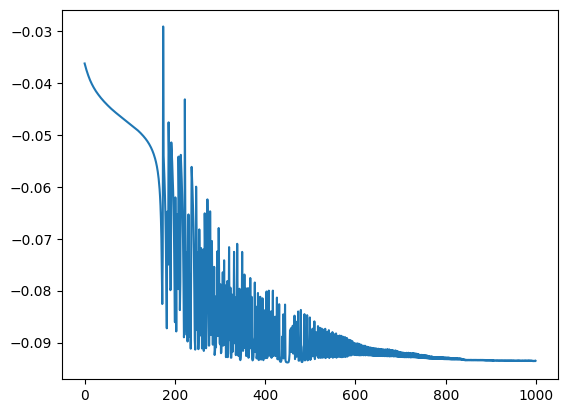

In [15]:
plt.plot(losses)

In [16]:
weights

tensor([ 0.2070,  0.0584, -9.9351, -0.4417,  0.3836,  0.2762, -1.2045,  1.0904,
         0.5828,  0.0241], requires_grad=True)

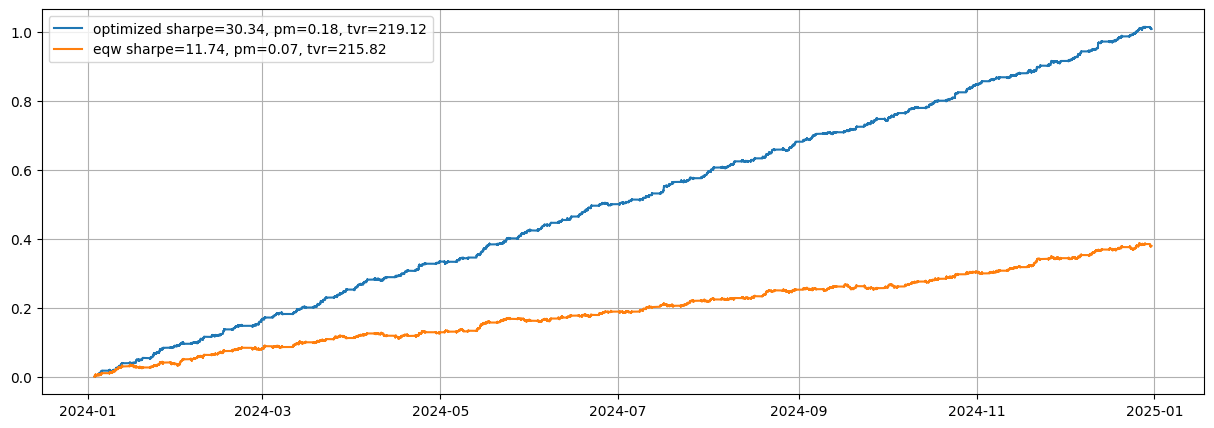

In [21]:
norm_pf = construct_portfolio(weights, portfolios_tensor)
norm_pf = renormalize_weights(norm_pf)

norm_pf = pd.DataFrame(data=norm_pf.detach().numpy(), index=sorted(cidx), columns=valid_tickers)
returns_df: pd.DataFrame = pd.DataFrame(data=returns.detach().numpy(), index=sorted(cidx), columns=valid_tickers)

descr_1 = describe_pf(norm_pf, returns_df)
pnl_optim = get_pnl_with_costs(norm_pf, returns_df, cost=0)

eqw = construct_portfolio(torch.ones(portfolios_tensor.shape[0], dtype=torch.float32, requires_grad=False), portfolios_tensor)
eqw = renormalize_weights(eqw)
eqw = pd.DataFrame(data=eqw.detach().numpy(), index=sorted(cidx), columns=valid_tickers)
descr_2 = describe_pf(eqw, returns_df)

eqw_pnl: pd.DataFrame = get_pnl_with_costs(eqw, returns_df, cost=0)

plt.figure(figsize=(15, 5))
plt.plot(pnl_optim, label='optimized '+ str(descr_1))
plt.plot(eqw_pnl, label='eqw ' + str(descr_2))
plt.legend()
plt.grid()
plt.show()

In [49]:
# задача: реализовать оптимизацию портфеля с помощью градиентного спуска с учетом комиссии
# проанализировать график функции потерь выше и стабилизировать его

torch.Size([10, 39206, 56])

In [17]:

# Создаем простую нейронную сеть для оптимизации портфеля
class PortfolioOptimizer(nn.Module):
    def __init__(self, n_assets):
        super(PortfolioOptimizer, self).__init__()
        # Один линейный слой, который будет выдавать веса для портфеля
        self.linear = nn.Linear(n_assets, 1)
        
    def forward(self, x):
        # Применяем линейное преобразование и softmax для нормализации весов
        return self.linear(x).squeeze()

# Инициализируем модель
n_assets = portfolios_tensor.shape[0]
model = PortfolioOptimizer(n_assets)

# Оптимизатор Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Функция потерь для оптимизации портфеля
def portfolio_loss(weights, returns, cost=0.001):
    # Нормализуем веса
    weights = torch.softmax(weights, dim=-1)
    
    # Рассчитываем доходность портфеля
    portfolio_returns = torch.sum(weights.unsqueeze(-1) * returns, dim=0)
    
    # Рассчитываем транзакционные издержки
    # Предполагаем, что издержки пропорциональны изменению позиций
    position_changes = torch.abs(weights.unsqueeze(-1) - weights.unsqueeze(-1).roll(1, dims=1))
    transaction_costs = torch.sum(position_changes * cost, dim=0)
    
    # Функция потерь: отрицательная доходность + транзакционные издержки
    loss = -torch.mean(portfolio_returns) + torch.mean(transaction_costs)
    
    return loss

In [ ]:
# НЕЙРОННЫЕ СЕТИ

# нейронные сети - это математические модели, которые используются для аппроксимации сложных функций.
# нейронные сети состоят из слоев, которые соединены между собой и имеют веса.
# веса - это числа, которые определяют, как каждый слой влияет на следующий слой.
# нейронные сети используются для решения задач классификации, регрессии и генерации данных.

# пример нейронной сети для решения задачи выше с тензорами

# Создаем простую нейронную сеть для оптимизации портфеля
class PortfolioOptimizer(nn.Module):
    def __init__(self, n_assets):
        super(PortfolioOptimizer, self).__init__()
        # Один линейный слой, который будет выдавать веса для портфеля
        self.linear = nn.Linear(n_assets, 1)
        
    def forward(self, x):
        # Применяем линейное преобразование и softmax для нормализации весов
        return self.linear(x).squeeze()

# Инициализируем модель
n_assets = portfolios_tensor.shape[0]
model = PortfolioOptimizer(n_assets)

# Оптимизатор Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Функция потерь для оптимизации портфеля
def portfolio_loss(weights, returns, cost=0.001):
    # Нормализуем веса
    weights = torch.softmax(weights, dim=-1)
    
    # Рассчитываем доходность портфеля
    portfolio_returns = torch.sum(weights.unsqueeze(-1) * returns, dim=0)
    
    # Рассчитываем транзакционные издержки
    # Предполагаем, что издержки пропорциональны изменению позиций
    position_changes = torch.abs(weights.unsqueeze(-1) - weights.unsqueeze(-1).roll(1, dims=1))
    transaction_costs = torch.sum(position_changes * cost, dim=0)
    
    # Функция потерь: отрицательная доходность + транзакционные издержки
    loss = -torch.mean(portfolio_returns) + torch.mean(transaction_costs)
    
    return loss

# Обучение модели
n_epochs = 1000
losses = []

for epoch in range(n_epochs):
    # Обнуляем градиенты
    optimizer.zero_grad()
    
    # Получаем веса из модели
    raw_weights = model.linear.weight.squeeze()
    
    # Рассчитываем функцию потерь
    loss = portfolio_loss(raw_weights, returns, cost=0.001)
    
    # Обратное распространение
    loss.backward()
    
    # Обновляем веса
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.6f}')

# Получаем финальные веса
with torch.no_grad():
    final_weights = torch.softmax(model.linear.weight.squeeze(), dim=-1)

print("Финальные веса портфеля:")
for i, ticker in enumerate(valid_tickers):
    print(f"{ticker}: {final_weights[i]:.4f}")

# Строим портфель с оптимизированными весами
optimized_pf = construct_portfolio(final_weights, portfolios_tensor)
optimized_pf = renormalize_weights(optimized_pf)
optimized_pf = pd.DataFrame(data=optimized_pf.detach().numpy(), index=sorted(cidx), columns=valid_tickers)

# Рассчитываем характеристики портфеля
descr_optimized = describe_pf(optimized_pf, returns_df)
optimized_pnl = get_pnl_with_costs(optimized_pf, returns_df, cost=0)

# Сравниваем с равновзвешенным портфелем
plt.figure(figsize=(15, 5))
plt.plot(optimized_pnl, label=f'Оптимизированный: {descr_optimized}')
plt.plot(eqw_pnl, label=f'Равновзвешенный: {descr_2}')
plt.plot(pnl_optim, label=f'Ручная оптимизация: {descr_1}')
plt.legend()
plt.grid()
plt.title('Сравнение портфелей')
plt.show()

# График функции потерь
plt.figure(figsize=(12, 5))
plt.plot(losses)
plt.title('Функция потерь во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.grid()
plt.show()






In [1]:
# Задача: написать итератор эпизодов рыночных данных.
# Эпизод -- это последовательность баров, содержащих
#  а) некоторую информацию (разные признаки, в т.ч. альфы выше), с помощью которой можно научиться предсказывать цены
#  б) цены, которые используются для обучения модели в качестве таргетов


In [2]:
# TODO: introduction to RL
# Add task to trade mean-reversion process with costs 
# (implement environment, agent, training loop)

##### JAX

JAX -- это python библиотека, ориетированная на векторизованные вычисления и предообработку программного кода (читай компиляцию) для высокоэффективных численных вычислений для данных большого обеъма.
Документация -- https://docs.jax.dev/en/latest/index.html
 

Массив a: [1. 2. 3.]
Массив b (a с a[1]=10): [ 1. 10.  3.]


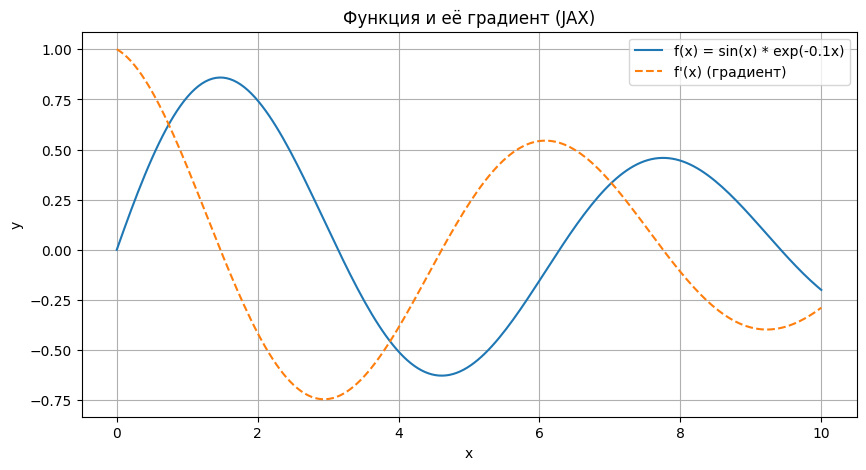

Умножение матриц:
 [[ 4  4]
 [10  8]]
Собственные значения: [-0.37228132+0.j  5.37228132+0.j]
Собственные векторы:
 [[-0.82456484+0.j -0.41597356+0.j]
 [ 0.56576746+0.j -0.90937671+0.j]]
Результат lax.cond (x > y): -1.0
Результат lax.scan: [ 0  1  3  6 10]
Результат jnp.where: [-1 -2 -3  4  5]


In [61]:
# примеры

import jax
import jax.numpy as jnp

jax.config.update('jax_enable_x64', True)

import matplotlib.pyplot as plt

# 1. Создание массива
a = jnp.array([1.0, 2.0, 3.0])
print("Массив a:", a)

# 2. Изменение элемента массива (массивы JAX неизменяемы, используем .at)
# Каждый раз при изменении элемента массива на самом деле создается новый массив
b = a.at[1].set(10.0)
print("Массив b (a с a[1]=10):", b)

# 3. Градиенты
# Пример: функция и её градиент
def my_func(x):
    return jnp.sin(x) * jnp.exp(-0.1 * x)

grad_my_func = jax.grad(my_func)

x_vals = jnp.linspace(0, 10, 200)
y_vals = my_func(x_vals)
grad_vals = jax.vmap(grad_my_func)(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='f(x) = sin(x) * exp(-0.1x)')
plt.plot(x_vals, grad_vals, label="f'(x) (градиент)", linestyle='--')
plt.legend()
plt.title('Функция и её градиент (JAX)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


# 4. Операции линейной алгебры
mat1 = jnp.array([[1, 2], [3, 4]])
mat2 = jnp.array([[2, 0], [1, 2]])
matmul = jnp.dot(mat1, mat2)
print("Умножение матриц:\n", matmul)
eigvals, eigvecs = jnp.linalg.eig(mat1)
print("Собственные значения:", eigvals)
print("Собственные векторы:\n", eigvecs)

# 5. Модуль lax (низкоуровневые примитивы): jax.lax...

# Пример: lax.cond (альтернатива if-else)
x = 3.0
y = 4.0
def true_fun(x, y):
    return x + y
def false_fun(x, y):
    return x - y

result = jax.lax.cond(x > y, true_fun, false_fun, x, y)
print("Результат lax.cond (x > y):", result)

# Пример: lax.scan (альтернатива циклу)
def body(carry, x):
    return carry + x, carry + x

init = 0
xs = jnp.arange(5)
final_carry, ys = jax.lax.scan(body, init, xs)
print("Результат lax.scan:", ys)

# 6. Альтернатива if-else (jax.numpy.where)
arr = jnp.array([1, 2, 3, 4, 5])
mask = arr > 3
out = jnp.where(mask, arr, -arr)
print("Результат jnp.where:", out)



In [62]:

# 8. Сравнение времени выполнения с numpy
import jax
import jax.numpy as jnp
import numpy as np
import time


# 7. JIT-компиляция
def compute(x):
    # Предполагаем, что x - это квадратная матрица
    return jnp.dot(jnp.sin(x), jnp.cos(x)) + jnp.dot(x, x)

jitted_compute = jax.jit(compute)


x = jnp.linspace(0, 10, 5)
print("JIT-компилированная функция compute(x):", compute(x))


# Функция для вычисления суммы синуса и косинуса
def np_compute(x):
    return np.dot(np.sin(x), np.cos(x)) + np.dot(x, x)

x_np = np.linspace(0, 10, 1_000_000)
x_jax = jnp.linspace(0, 10, 1_000_000)

# Время выполнения numpy
start = time.time()
np_result = np_compute(x_np)
end = time.time()
print("Время выполнения numpy:", end - start, "сек")

# Время выполнения jax без jit
start = time.time()
jax_result = compute(x_jax)  # py_func - исходная функция без jit
end = time.time()
print("Время выполнения jax без jit:", end - start, "сек")

# Время выполнения jax с jit (первая и вторая прогонка)
start = time.time()
_ = jitted_compute(x_jax)  # первая прогонка (компиляция)
end = time.time()
print("Время выполнения jax с jit (первая прогонка):", end - start, "сек")

start = time.time()
_ = compute(x_jax)  # вторая прогонка (уже скомпилировано)
end = time.time()
print("Время выполнения jax с jit (вторая прогонка):", end - start, "сек")



JIT-компилированная функция compute(x): 187.53014385266613
Время выполнения numpy: 0.015594244003295898 сек
Время выполнения jax без jit: 0.05657672882080078 сек
Время выполнения jax с jit (первая прогонка): 0.03812527656555176 сек
Время выполнения jax с jit (вторая прогонка): 0.005692005157470703 сек


In [90]:
# пример обучения с помощью JAX (вместо torch) с оптимизацией портфеля

# определим тензоры для портфеля (JAX)
portfolios_tensor = jnp.stack([jnp.asarray(pf.values, dtype=jnp.float32) for pf in portfolios], axis=0)
portfolios_tensor = jnp.where(jnp.isnan(portfolios_tensor), 0, portfolios_tensor)

# определим веса и доходности (JAX)
weights = jnp.ones(portfolios_tensor.shape[0], dtype=jnp.float32)

returns = jnp.asarray(tickers_returns.loc[cidx, ccols].values, dtype=jnp.float32)
returns = jnp.where(jnp.isnan(returns), 0, returns)

# определим функции для построения портфеля и нормализации весов (JAX)
@jax.jit
def construct_portfolio(weights: jax.Array, portfolios_tensor: jax.Array) -> jax.Array:
    return (weights[:, None, None] * portfolios_tensor).sum(axis=0)

@jax.jit
def renormalize_weights(pf: jax.Array) -> jax.Array:
    pf = pf - pf.mean(axis=-1, keepdims=True)
    pf = pf / (jnp.abs(pf).sum(axis=-1, keepdims=True) + 1e-8)
    return pf

# определим функцию для вычисления доходности портфеля (JAX)
@jax.jit
def get_portfolio_return(pf: jax.Array, returns: jax.Array) -> jax.Array:
    return (pf * returns).sum(axis=-1)

@jax.jit
def sharpe_loss(pf: jax.Array, returns: jax.Array) -> jax.Array:
    pf_returns = get_portfolio_return(pf, returns)
    return -pf_returns.mean() / (pf_returns.std() + 1e-8)

In [110]:

# напишем оптимизацию портфеля с помощью градиентного спуска (JAX)
N: int = 1_000
lr: float = 1

losses: list[float] = []

# JAX требует, чтобы переменные были immutable, поэтому используем jax.numpy и jax.grad
from jax import grad

# функция для вычисления loss по weights
@jax.jit
def loss_fn(weights, portfolios_tensor, returns):
    pf = construct_portfolio(weights, portfolios_tensor)
    pf = renormalize_weights(pf)
    return sharpe_loss(pf, returns)

# получаем функцию для вычисления градиента по weights
loss_grad_fn = jax.jit(grad(loss_fn, argnums=0))

weights = jnp.ones(portfolios_tensor.shape[0], dtype=jnp.float32) / portfolios_tensor.shape[0]

for i in tqdm(range(N)):
    loss = loss_fn(weights, portfolios_tensor, returns)
    grad_weights = loss_grad_fn(weights, portfolios_tensor, returns)
    weights = weights - lr * grad_weights

    losses.append(float(loss))

    if i % 50 == 0:
        print(f"Iteration {i}: Loss = {float(loss)}")


  0%|          | 3/1000 [00:00<02:05,  7.97it/s]

Iteration 0: Loss = -0.03620364889502525


  5%|▌         | 53/1000 [00:03<00:55, 17.06it/s]

Iteration 50: Loss = -0.0492277517914772


 10%|█         | 103/1000 [00:06<00:54, 16.44it/s]

Iteration 100: Loss = -0.05263529345393181


 15%|█▌        | 153/1000 [00:09<00:56, 15.06it/s]

Iteration 150: Loss = -0.08515655994415283


 20%|██        | 203/1000 [00:12<00:50, 15.87it/s]

Iteration 200: Loss = -0.08353380113840103


 25%|██▌       | 253/1000 [00:16<00:46, 15.91it/s]

Iteration 250: Loss = -0.08929333835840225


 30%|███       | 303/1000 [00:19<00:48, 14.38it/s]

Iteration 300: Loss = -0.09099911898374557


 35%|███▌      | 353/1000 [00:22<00:42, 15.09it/s]

Iteration 350: Loss = -0.08648186177015305


 40%|████      | 403/1000 [00:26<00:39, 14.97it/s]

Iteration 400: Loss = -0.09213323891162872


 45%|████▌     | 453/1000 [00:29<00:38, 14.09it/s]

Iteration 450: Loss = -0.08864471316337585


 50%|█████     | 503/1000 [00:32<00:29, 17.02it/s]

Iteration 500: Loss = -0.0908944234251976


 55%|█████▌    | 553/1000 [00:35<00:28, 15.85it/s]

Iteration 550: Loss = -0.09131184965372086


 60%|██████    | 603/1000 [00:38<00:26, 14.97it/s]

Iteration 600: Loss = -0.09195546805858612


 65%|██████▌   | 653/1000 [00:42<00:22, 15.60it/s]

Iteration 650: Loss = -0.09247064590454102


 70%|███████   | 703/1000 [00:45<00:20, 14.83it/s]

Iteration 700: Loss = -0.09290443360805511


 75%|███████▌  | 753/1000 [00:48<00:16, 15.15it/s]

Iteration 750: Loss = -0.09333077073097229


 80%|████████  | 803/1000 [00:51<00:12, 15.59it/s]

Iteration 800: Loss = -0.0934411957859993


 85%|████████▌ | 853/1000 [00:55<00:10, 14.62it/s]

Iteration 850: Loss = -0.09346498548984528


 90%|█████████ | 903/1000 [00:58<00:06, 15.36it/s]

Iteration 900: Loss = -0.0934833362698555


 95%|█████████▌| 953/1000 [01:01<00:03, 15.58it/s]

Iteration 950: Loss = -0.09355349093675613


100%|██████████| 1000/1000 [01:05<00:00, 15.38it/s]


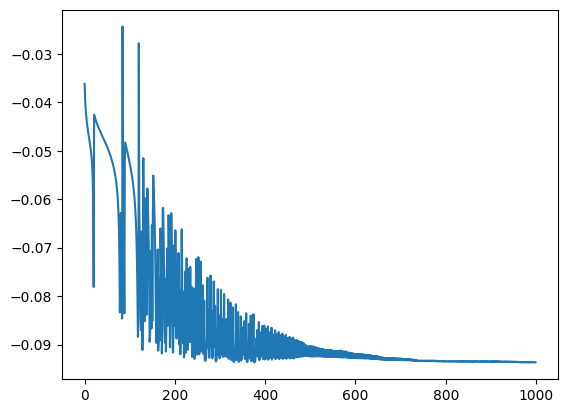

In [111]:
plt.plot(losses)

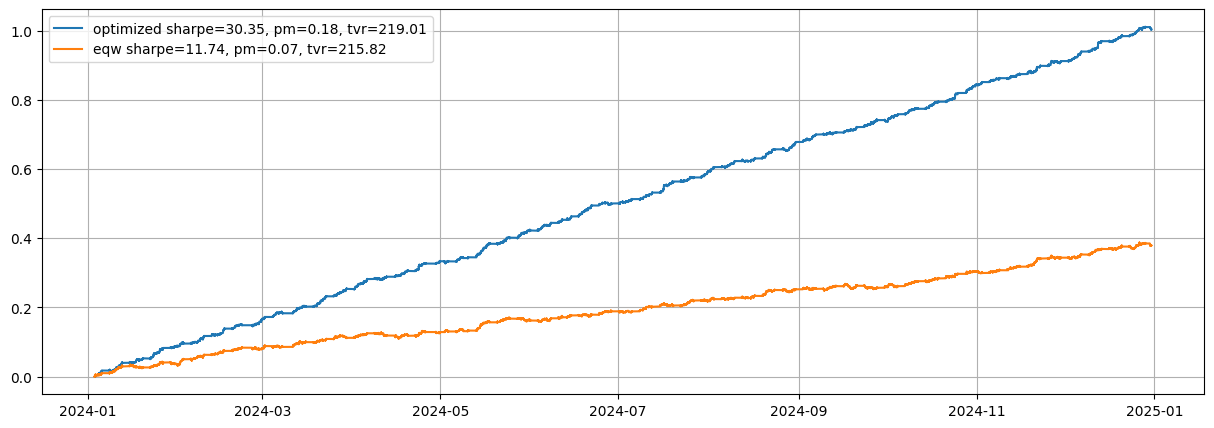

In [112]:
norm_pf = construct_portfolio(weights, portfolios_tensor)
norm_pf = renormalize_weights(norm_pf)

norm_pf = pd.DataFrame(data=norm_pf, index=sorted(cidx), columns=valid_tickers)
returns_df: pd.DataFrame = pd.DataFrame(data=returns, index=sorted(cidx), columns=valid_tickers)

descr_1 = describe_pf(norm_pf, returns_df)
pnl_optim = get_pnl_with_costs(norm_pf, returns_df, cost=0)

eqw = construct_portfolio(jnp.ones(portfolios_tensor.shape[0], dtype=jnp.float32), portfolios_tensor)
eqw = renormalize_weights(eqw)
eqw = pd.DataFrame(data=eqw, index=sorted(cidx), columns=valid_tickers)
descr_2 = describe_pf(eqw, returns_df)

eqw_pnl: pd.DataFrame = get_pnl_with_costs(eqw, returns_df, cost=0)

plt.figure(figsize=(15, 5))
plt.plot(pnl_optim, label='optimized '+ str(descr_1))
plt.plot(eqw_pnl, label='eqw ' + str(descr_2))
plt.legend()
plt.grid()
plt.show()

In [113]:
# сделаем тоже самое, но ускорим с помощью jax.lax.scan

# Оптимизированная версия: используем jax.lax.scan для ускорения и минимизации питон-лупа

N: int = 1_000
lr: float = 1e-1

from jax import grad, jit, lax

@jit
def loss_fn(weights, portfolios_tensor, returns):
    pf = construct_portfolio(weights, portfolios_tensor)
    pf = renormalize_weights(pf)
    return sharpe_loss(pf, returns)

loss_grad_fn = jit(grad(loss_fn, argnums=0))

@jit
def step_fn(carry, _):
    weights = carry
    loss = loss_fn(weights, portfolios_tensor, returns)
    grad_weights = loss_grad_fn(weights, portfolios_tensor, returns)
    new_weights = weights - lr * grad_weights
    return new_weights, loss

weights_init = jnp.ones(portfolios_tensor.shape[0], dtype=jnp.float32) / portfolios_tensor.shape[0]

print('Запускаем цикл оптимизации...')
t_start = time.time()
# Используем lax.scan для быстрого выполнения оптимизации и сбора всех лоссов
weights_final, losses_jax = lax.scan(step_fn, weights_init, None, length=N)
print(f'Время оптимизации: {time.time() - t_start}')

# Переводим лоссы в обычный питоновский список для совместимости с matplotlib
losses = list(map(float, losses_jax))

# Печатаем только каждые 50 шагов (ускоряем: не делаем print внутри JIT)
for i in range(0, N, 50):
    print(f"Iteration {i}: Loss = {losses[i]}")

weights = weights_final  # финальные веса после оптимизации


run optimization loop...
optimization time: 23.50024938583374
Iteration 0: Loss = -0.03620364889502525
Iteration 50: Loss = -0.04418020695447922
Iteration 100: Loss = -0.04784059897065163
Iteration 150: Loss = -0.052984800189733505
Iteration 200: Loss = -0.06378255784511566
Iteration 250: Loss = -0.0708099901676178
Iteration 300: Loss = -0.0923101156949997
Iteration 350: Loss = -0.0825968086719513
Iteration 400: Loss = -0.09373203665018082
Iteration 450: Loss = -0.09312046319246292
Iteration 500: Loss = -0.09313303232192993
Iteration 550: Loss = -0.09186188876628876
Iteration 600: Loss = -0.09232907742261887
Iteration 650: Loss = -0.09260393679141998
Iteration 700: Loss = -0.09282806515693665
Iteration 750: Loss = -0.09309572726488113
Iteration 800: Loss = -0.09323520213365555
Iteration 850: Loss = -0.09342657029628754
Iteration 900: Loss = -0.09349814802408218
Iteration 950: Loss = -0.09353683143854141


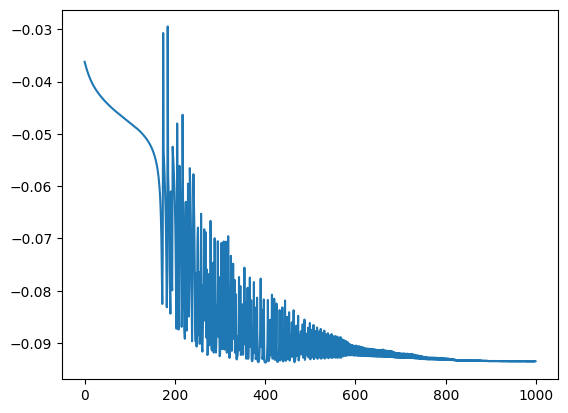

In [114]:
plt.plot(losses)

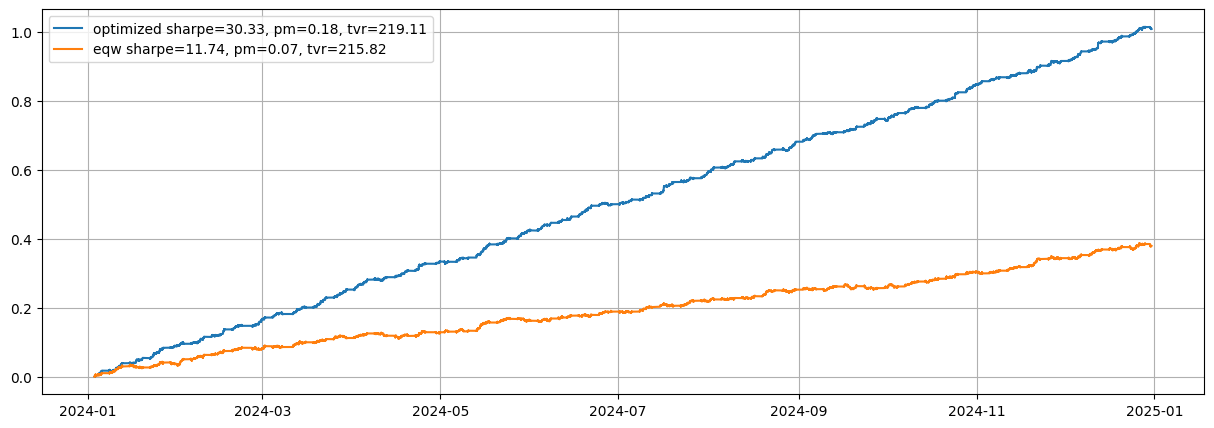

In [115]:
norm_pf = construct_portfolio(weights, portfolios_tensor)
norm_pf = renormalize_weights(norm_pf)

norm_pf = pd.DataFrame(data=norm_pf, index=sorted(cidx), columns=valid_tickers)
returns_df: pd.DataFrame = pd.DataFrame(data=returns, index=sorted(cidx), columns=valid_tickers)

descr_1 = describe_pf(norm_pf, returns_df)
pnl_optim = get_pnl_with_costs(norm_pf, returns_df, cost=0)

eqw = construct_portfolio(jnp.ones(portfolios_tensor.shape[0], dtype=jnp.float32), portfolios_tensor)
eqw = renormalize_weights(eqw)
eqw = pd.DataFrame(data=eqw, index=sorted(cidx), columns=valid_tickers)
descr_2 = describe_pf(eqw, returns_df)

eqw_pnl: pd.DataFrame = get_pnl_with_costs(eqw, returns_df, cost=0)

plt.figure(figsize=(15, 5))
plt.plot(pnl_optim, label='optimized '+ str(descr_1))
plt.plot(eqw_pnl, label='eqw ' + str(descr_2))
plt.legend()
plt.grid()
plt.show()

##### POLARS

POLARS -- библиотека в общем аналогичная PANDAS, но работающая куда более быстро, за счет немного другой философии обработки массивов (датафреймов) главным образом за счет отказа от индексов и их обработки, а обращением напрямую к индексу массива как порядкового номера.

https://pola.rs/academy/

Документация -- https://docs.pola.rs/api/python/stable/reference/index.html

In [ ]:
# Примеры работы с Polars для обработки финансовых данных

# Polars - это быстрая библиотека для работы с данными, написанная на Rust.
# Основные преимущества:
# 1. Высокая производительность (в 2-10 раз быстрее pandas для многих операций)
# 2. Отсутствие индексов - работа с данными по порядковому номеру строки
# 3. Ленивые вычисления (lazy evaluation) для оптимизации запросов
# 4. Параллельная обработка данных
# 5. Строгая типизация

# Рассмотрим примеры работы с финансовыми данными MOEX

In [1]:
# 1. Базовые операции с Polars

import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

# Создание DataFrame в Polars
print("=== Создание и базовые операции с Polars ===")

# Создаем данные для примера
np.random.seed(42)
n_days = 1000
n_assets = 5

# Генерируем случайные данные о ценах
dates = pd.date_range('2020-01-01', periods=n_days, freq='D')
tickers = ['SBER', 'GAZP', 'LKOH', 'NVTK', 'ROSN']

# Создаем DataFrame с ценами
price_data = []
for ticker in tickers:
    prices = 100 * np.cumprod(1 + np.random.normal(0.001, 0.02, n_days))
    for i, (date, price) in enumerate(zip(dates, prices)):
        price_data.append({
            'date': date,
            'ticker': ticker,
            'price': price,
            'volume': np.random.randint(1000, 10000)
        })

# Создаем Polars DataFrame
df_polars = pl.DataFrame(price_data)
print("Polars DataFrame:")
print(df_polars.head())
print(f"Размер: {df_polars.shape}")

# Создаем аналогичный Pandas DataFrame для сравнения
df_pandas = pd.DataFrame(price_data)
print(f"\nPandas DataFrame размер: {df_pandas.shape}")

# Базовые операции
print("\n=== Базовые операции ===")

# Фильтрация
sber_data = df_polars.filter(pl.col("ticker") == "SBER")
print(f"Данные по SBER: {sber_data.shape}")

# Группировка и агрегация
daily_stats = df_polars.group_by("date").agg([
    pl.col("price").mean().alias("avg_price"),
    pl.col("volume").sum().alias("total_volume"),
    pl.col("ticker").count().alias("num_tickers")
])
print("Статистика по дням:")
print(daily_stats.head())

# Сортировка
sorted_data = df_polars.sort(["ticker", "date"])
print("Отсортированные данные:")
print(sorted_data.head())


=== Создание и базовые операции с Polars ===
Polars DataFrame:
shape: (5, 4)
┌─────────────────────┬────────┬────────────┬────────┐
│ date                ┆ ticker ┆ price      ┆ volume │
│ ---                 ┆ ---    ┆ ---        ┆ ---    │
│ datetime[μs]        ┆ str    ┆ f64        ┆ i64    │
╞═════════════════════╪════════╪════════════╪════════╡
│ 2020-01-01 00:00:00 ┆ SBER   ┆ 101.093428 ┆ 9619   │
│ 2020-01-02 00:00:00 ┆ SBER   ┆ 100.914969 ┆ 2895   │
│ 2020-01-03 00:00:00 ┆ SBER   ┆ 102.323114 ┆ 7090   │
│ 2020-01-04 00:00:00 ┆ SBER   ┆ 105.54226  ┆ 9508   │
│ 2020-01-05 00:00:00 ┆ SBER   ┆ 105.153541 ┆ 7082   │
└─────────────────────┴────────┴────────────┴────────┘
Размер: (5000, 4)

Pandas DataFrame размер: (5000, 4)

=== Базовые операции ===
Данные по SBER: (1000, 4)
Статистика по дням:
shape: (5, 4)
┌─────────────────────┬────────────┬──────────────┬─────────────┐
│ date                ┆ avg_price  ┆ total_volume ┆ num_tickers │
│ ---                 ┆ ---        ┆ ---      

In [2]:
# 2. Обработка финансовых данных с MOEX

print("=== Обработка финансовых данных MOEX с Polars ===")

# Загружаем данные MOEX (используем те же данные, что и в предыдущих примерах)
# Для демонстрации создадим синтетические данные, имитирующие структуру MOEX

# Создаем данные о сделках (trades)
np.random.seed(42)
n_trades = 100000
trade_data = []

tickers = ['SBER', 'GAZP', 'LKOH', 'NVTK', 'ROSN', 'AFLT', 'ALRS', 'CHMF', 'GMKN', 'MAGN']
base_prices = {'SBER': 200, 'GAZP': 150, 'LKOH': 6000, 'NVTK': 1200, 'ROSN': 400, 
               'AFLT': 50, 'ALRS': 80, 'CHMF': 1200, 'GMKN': 15000, 'MAGN': 2000}

for i in range(n_trades):
    ticker = np.random.choice(tickers)
    base_price = base_prices[ticker]
    
    # Генерируем время сделки
    timestamp = pd.Timestamp('2024-01-01') + pd.Timedelta(seconds=np.random.randint(0, 86400))
    
    # Генерируем цену с небольшими отклонениями
    price = base_price * (1 + np.random.normal(0, 0.01))
    
    # Генерируем объем
    volume = np.random.randint(1, 1000)
    
    # Направление сделки (1 - покупка, -1 - продажа)
    direction = np.random.choice([1, -1])
    
    trade_data.append({
        'timestamp': timestamp,
        'ticker': ticker,
        'price': price,
        'volume': volume,
        'direction': direction,
        'trade_id': i
    })

# Создаем Polars DataFrame
trades_df = pl.DataFrame(trade_data)
print(f"Данные о сделках: {trades_df.shape}")
print(trades_df.head())

# Анализ данных о сделках
print("\n=== Анализ сделок ===")

# Статистика по тикерам
ticker_stats = trades_df.group_by("ticker").agg([
    pl.col("price").mean().alias("avg_price"),
    pl.col("volume").sum().alias("total_volume"),
    pl.col("volume").mean().alias("avg_volume"),
    pl.col("direction").sum().alias("net_direction"),  # положительное - больше покупок
    pl.len().alias("num_trades")
]).sort("total_volume", descending=True)

print("Статистика по тикерам:")
print(ticker_stats)

# Временной анализ
trades_with_hour = trades_df.with_columns(
    pl.col("timestamp").dt.hour().alias("hour")
)

hourly_stats = trades_with_hour.group_by("hour").agg([
    pl.col("volume").sum().alias("total_volume"),
    pl.col("price").mean().alias("avg_price"),
    pl.len().alias("num_trades")
]).sort("hour")

print("\nСтатистика по часам:")
print(hourly_stats.head())


=== Обработка финансовых данных MOEX с Polars ===
Данные о сделках: (100000, 6)
shape: (5, 6)
┌─────────────────────┬────────┬─────────────┬────────┬───────────┬──────────┐
│ timestamp           ┆ ticker ┆ price       ┆ volume ┆ direction ┆ trade_id │
│ ---                 ┆ ---    ┆ ---         ┆ ---    ┆ ---       ┆ ---      │
│ datetime[μs]        ┆ str    ┆ f64         ┆ i64    ┆ i64       ┆ i64      │
╞═════════════════════╪════════╪═════════════╪════════╪═══════════╪══════════╡
│ 2024-01-01 04:23:15 ┆ ALRS   ┆ 79.110496   ┆ 467    ┆ 1         ┆ 0        │
│ 2024-01-01 12:15:31 ┆ CHMF   ┆ 1203.826826 ┆ 872    ┆ -1        ┆ 1        │
│ 2024-01-01 18:40:21 ┆ LKOH   ┆ 6004.789909 ┆ 414    ┆ -1        ┆ 2        │
│ 2024-01-01 01:28:31 ┆ GAZP   ┆ 149.760725  ┆ 956    ┆ 1         ┆ 3        │
│ 2024-01-01 14:55:07 ┆ SBER   ┆ 200.044444  ┆ 511    ┆ -1        ┆ 4        │
└─────────────────────┴────────┴─────────────┴────────┴───────────┴──────────┘

=== Анализ сделок ===
Статистика по 

In [3]:
# 3. Ленивые вычисления (Lazy Evaluation) в Polars

print("=== Ленивые вычисления в Polars ===")

# Ленивые вычисления позволяют оптимизировать запросы перед их выполнением
# Это особенно полезно для сложных операций с большими данными

# Создаем ленивый запрос
lazy_query = (
    trades_df.lazy()
    .filter(pl.col("volume") > 100)  # Фильтруем крупные сделки
    .with_columns([
        (pl.col("price") * pl.col("volume")).alias("trade_value"),
        pl.col("timestamp").dt.date().alias("date")
    ])
    .group_by(["ticker", "date"])
    .agg([
        pl.col("trade_value").sum().alias("daily_value"),
        pl.col("volume").sum().alias("daily_volume"),
        pl.col("price").mean().alias("vwap"),  # Volume Weighted Average Price
        pl.len().alias("num_trades")
    ])
    .sort(["ticker", "date"])
)

print("Ленивый запрос создан. Теперь выполняем его:")
print("План выполнения:")
print(lazy_query.explain())

# Выполняем запрос
result = lazy_query.collect()
print(f"\nРезультат: {result.shape}")
print(result.head())

# Сравнение производительности: ленивый vs обычный запрос
print("\n=== Сравнение производительности ===")

# Обычный запрос
start_time = time.time()
eager_result = (
    trades_df
    .filter(pl.col("volume") > 100)
    .with_columns([
        (pl.col("price") * pl.col("volume")).alias("trade_value"),
        pl.col("timestamp").dt.date().alias("date")
    ])
    .group_by(["ticker", "date"])
    .agg([
        pl.col("trade_value").sum().alias("daily_value"),
        pl.col("volume").sum().alias("daily_volume"),
        pl.col("price").mean().alias("vwap"),
        pl.len().alias("num_trades")
    ])
    .sort(["ticker", "date"])
)
eager_time = time.time() - start_time

# Ленивый запрос
start_time = time.time()
lazy_result = lazy_query.collect()
lazy_time = time.time() - start_time

print(f"Время выполнения обычного запроса: {eager_time:.4f} сек")
print(f"Время выполнения ленивого запроса: {lazy_time:.4f} сек")
print(f"Ускорение: {eager_time/lazy_time:.2f}x")


=== Ленивые вычисления в Polars ===
Ленивый запрос создан. Теперь выполняем его:
План выполнения:
SORT BY [col("ticker"), col("date")]
  AGGREGATE
  	[col("trade_value").sum().alias("daily_value"), col("volume").sum().alias("daily_volume"), col("price").mean().alias("vwap"), len().alias("num_trades")] BY [col("ticker"), col("date")] FROM
     WITH_COLUMNS:
     [[(col("price")) * (col("volume").cast(Float64))].alias("trade_value"), col("timestamp").dt.date().alias("date")] 
      FILTER [(col("volume")) > (100)] FROM
        DF ["timestamp", "ticker", "price", "volume", ...]; PROJECT["volume", "price", "ticker", "timestamp"] 4/6 COLUMNS

Результат: (10, 6)
shape: (5, 6)
┌────────┬────────────┬─────────────┬──────────────┬──────────────┬────────────┐
│ ticker ┆ date       ┆ daily_value ┆ daily_volume ┆ vwap         ┆ num_trades │
│ ---    ┆ ---        ┆ ---         ┆ ---          ┆ ---          ┆ ---        │
│ str    ┆ date       ┆ f64         ┆ i64          ┆ f64          ┆ u32       

In [4]:
# 4. Анализ портфеля с использованием Polars

print("=== Анализ портфеля с Polars ===")

# Создаем данные о ценах для анализа портфеля
np.random.seed(42)
n_days = 252  # Год торговых дней
tickers = ['SBER', 'GAZP', 'LKOH', 'NVTK', 'ROSN']

# Генерируем исторические цены
dates = pd.date_range('2023-01-01', periods=n_days, freq='D')
price_data = []

for ticker in tickers:
    # Генерируем случайные доходности
    returns = np.random.normal(0.0005, 0.02, n_days)  # Средняя доходность 0.05% в день
    prices = 100 * np.cumprod(1 + returns)
    
    for date, price in zip(dates, prices):
        price_data.append({
            'date': date,
            'ticker': ticker,
            'price': price
        })

# Создаем Polars DataFrame
prices_df = pl.DataFrame(price_data)

# Вычисляем доходности
returns_df = (
    prices_df
    .sort(["ticker", "date"])
    .with_columns([
        pl.col("price").pct_change().over("ticker").alias("returns")
    ])
    .filter(pl.col("returns").is_not_null())
)

print("Данные о доходностях:")
print(returns_df.head())

# Анализ рисков и доходности
portfolio_stats = (
    returns_df
    .group_by("ticker")
    .agg([
        pl.col("returns").mean().alias("mean_return"),
        pl.col("returns").std().alias("volatility"),
        pl.col("returns").min().alias("min_return"),
        pl.col("returns").max().alias("max_return"),
        pl.col("returns").quantile(0.05).alias("var_5pct"),  # Value at Risk 5%
        pl.col("returns").quantile(0.01).alias("var_1pct"),  # Value at Risk 1%
    ])
    .with_columns([
        (pl.col("mean_return") / pl.col("volatility")).alias("sharpe_ratio")
    ])
    .sort("sharpe_ratio", descending=True)
)

print("\nСтатистика по активам:")
print(portfolio_stats)

# Корреляционная матрица
print("\n=== Корреляционный анализ ===")

# Преобразуем данные для корреляционного анализа
returns_pivot = (
    returns_df
    .select(["date", "ticker", "returns"])
    .pivot(index="date", columns="ticker", values="returns")
    .sort("date")
)

print("Pivot таблица доходностей:")
print(returns_pivot.head())

# Вычисляем корреляции
correlation_matrix = returns_pivot.select(pl.exclude("date")).corr()
print("\nКорреляционная матрица:")
print(correlation_matrix)


=== Анализ портфеля с Polars ===
Данные о доходностях:
shape: (5, 4)
┌─────────────────────┬────────┬────────────┬───────────┐
│ date                ┆ ticker ┆ price      ┆ returns   │
│ ---                 ┆ ---    ┆ ---        ┆ ---       │
│ datetime[μs]        ┆ str    ┆ f64        ┆ f64       │
╞═════════════════════╪════════╪════════════╪═══════════╡
│ 2023-01-02 00:00:00 ┆ GAZP   ┆ 106.500065 ┆ 0.021149  │
│ 2023-01-03 00:00:00 ┆ GAZP   ┆ 103.317055 ┆ -0.029887 │
│ 2023-01-04 00:00:00 ┆ GAZP   ┆ 102.36812  ┆ -0.009185 │
│ 2023-01-05 00:00:00 ┆ GAZP   ┆ 105.013131 ┆ 0.025838  │
│ 2023-01-06 00:00:00 ┆ GAZP   ┆ 103.579346 ┆ -0.013653 │
└─────────────────────┴────────┴────────────┴───────────┘

Статистика по активам:
shape: (5, 8)
┌────────┬─────────────┬────────────┬────────────┬────────────┬───────────┬───────────┬────────────┐
│ ticker ┆ mean_return ┆ volatility ┆ min_return ┆ max_return ┆ var_5pct  ┆ var_1pct  ┆ sharpe_rat │
│ ---    ┆ ---         ┆ ---        ┆ ---        ┆ --

/tmp/ipykernel_15035/1446494246.py:70: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  .pivot(index="date", columns="ticker", values="returns")


=== Оптимизация портфеля с Polars ===
Запускаем оптимизацию портфеля...
Iteration 0: Loss = -0.000000
Iteration 100: Loss = -0.182863
Iteration 200: Loss = -0.182863
Iteration 300: Loss = -0.182863
Iteration 400: Loss = -0.182863
Iteration 500: Loss = -0.182863
Iteration 600: Loss = -0.182863
Iteration 700: Loss = -0.182863
Iteration 800: Loss = -0.182863
Iteration 900: Loss = -0.182863

Оптимальные веса:
SBER: -0.0533
GAZP: -0.3194
LKOH: 0.3357
NVTK: 0.1643
ROSN: -0.1273


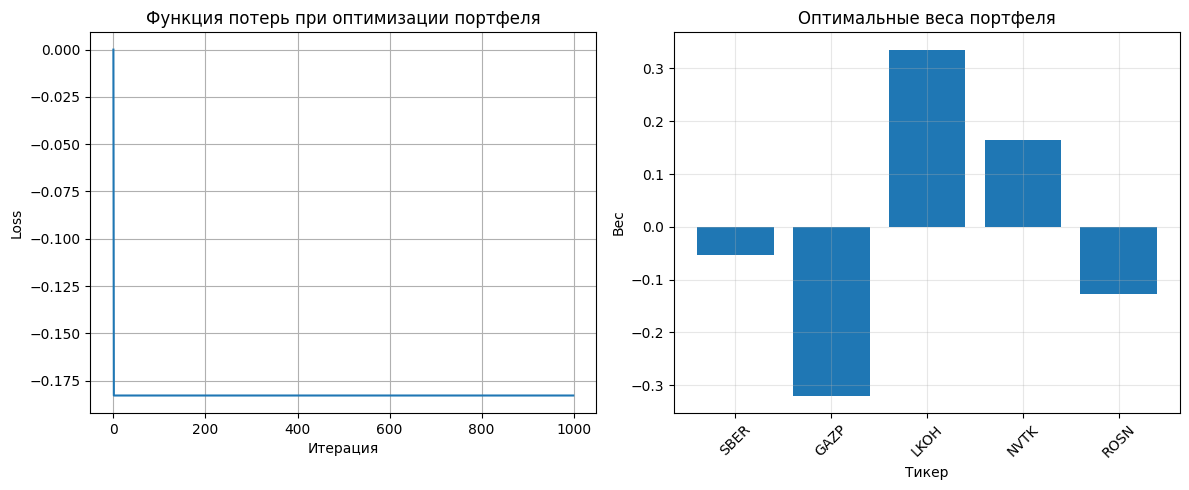


Сравнение портфелей:
Оптимизированный портфель - Sharpe: 0.1829
Равновзвешенный портфель - Sharpe: 0.1303


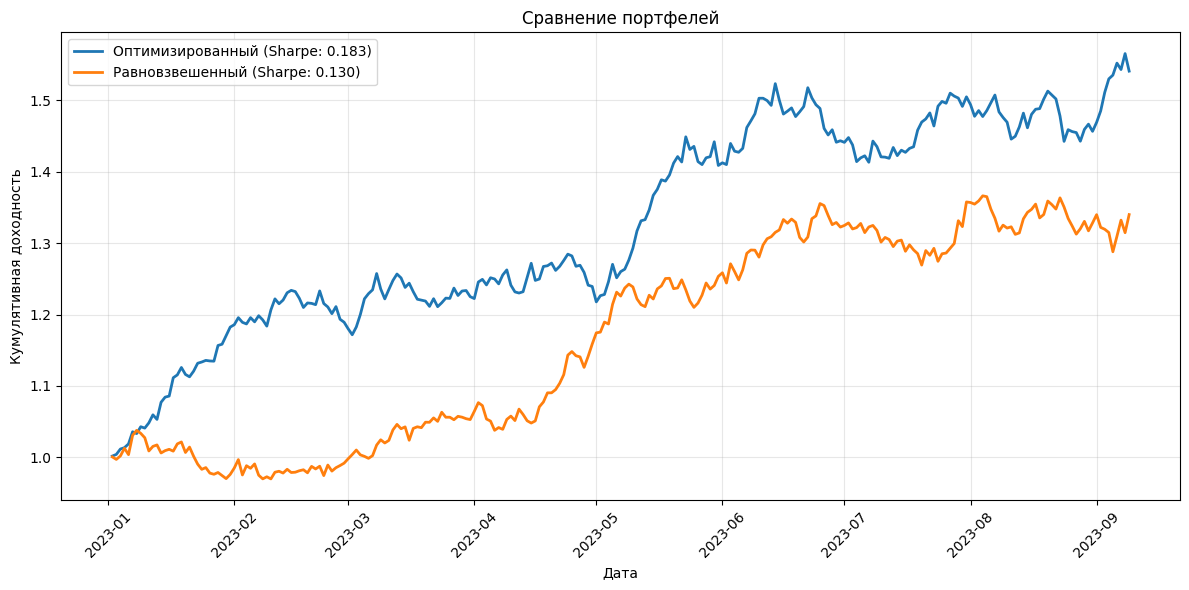

In [5]:
# 5. Оптимизация портфеля с Polars

print("=== Оптимизация портфеля с Polars ===")

# Создаем функцию для оптимизации портфеля (аналогично предыдущим примерам с Torch и JAX)
def optimize_portfolio_polars(returns_data, n_iterations=1000, learning_rate=0.01):
    """
    Оптимизация портфеля методом градиентного спуска с использованием Polars
    """
    import numpy as np
    
    # Преобразуем данные в numpy для вычислений
    returns_matrix = returns_data.select(pl.exclude("date")).to_numpy()
    
    # Инициализируем веса равномерно
    n_assets = returns_matrix.shape[1]
    weights = np.ones(n_assets) / n_assets
    
    # Функция для нормализации весов
    def normalize_weights(w):
        w = w - w.mean()
        w = w / (np.abs(w).sum() + 1e-8)
        return w
    
    # Функция для вычисления доходности портфеля
    def portfolio_return(w, returns):
        return np.sum(w * returns, axis=1)
    
    # Функция потерь (отрицательный коэффициент Шарпа)
    def sharpe_loss(w, returns):
        pf_returns = portfolio_return(w, returns)
        return -np.mean(pf_returns) / (np.std(pf_returns) + 1e-8)
    
    # Градиентный спуск
    losses = []
    for i in range(n_iterations):
        # Нормализуем веса
        w_norm = normalize_weights(weights)
        
        # Вычисляем функцию потерь
        loss = sharpe_loss(w_norm, returns_matrix)
        losses.append(loss)
        
        # Простой градиент (конечные разности)
        eps = 1e-6
        grad = np.zeros_like(weights)
        for j in range(len(weights)):
            weights_plus = weights.copy()
            weights_plus[j] += eps
            w_plus_norm = normalize_weights(weights_plus)
            loss_plus = sharpe_loss(w_plus_norm, returns_matrix)
            
            weights_minus = weights.copy()
            weights_minus[j] -= eps
            w_minus_norm = normalize_weights(weights_minus)
            loss_minus = sharpe_loss(w_minus_norm, returns_matrix)
            
            grad[j] = (loss_plus - loss_minus) / (2 * eps)
        
        # Обновляем веса
        weights -= learning_rate * grad
        
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss:.6f}")
    
    return normalize_weights(weights), losses

# Выполняем оптимизацию
print("Запускаем оптимизацию портфеля...")
optimal_weights, losses = optimize_portfolio_polars(returns_pivot)

print(f"\nОптимальные веса:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

# Строим график функции потерь
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Функция потерь при оптимизации портфеля')
plt.xlabel('Итерация')
plt.ylabel('Loss')
plt.grid(True)

# Строим график весов
plt.subplot(1, 2, 2)
plt.bar(tickers, optimal_weights)
plt.title('Оптимальные веса портфеля')
plt.xlabel('Тикер')
plt.ylabel('Вес')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сравниваем с равновзвешенным портфелем
equal_weights = np.ones(len(tickers)) / len(tickers)
returns_matrix = returns_pivot.select(pl.exclude("date")).to_numpy()

# Доходности портфелей
optimal_returns = np.sum(optimal_weights * returns_matrix, axis=1)
equal_returns = np.sum(equal_weights * returns_matrix, axis=1)

# Кумулятивные доходности
optimal_cumret = np.cumprod(1 + optimal_returns)
equal_cumret = np.cumprod(1 + equal_returns)

# Коэффициенты Шарпа
optimal_sharpe = np.mean(optimal_returns) / (np.std(optimal_returns) + 1e-8)
equal_sharpe = np.mean(equal_returns) / (np.std(equal_returns) + 1e-8)

print(f"\nСравнение портфелей:")
print(f"Оптимизированный портфель - Sharpe: {optimal_sharpe:.4f}")
print(f"Равновзвешенный портфель - Sharpe: {equal_sharpe:.4f}")

# График кумулятивных доходностей
plt.figure(figsize=(12, 6))
dates_plot = returns_pivot.select("date").to_series().to_pandas()
plt.plot(dates_plot, optimal_cumret, label=f'Оптимизированный (Sharpe: {optimal_sharpe:.3f})', linewidth=2)
plt.plot(dates_plot, equal_cumret, label=f'Равновзвешенный (Sharpe: {equal_sharpe:.3f})', linewidth=2)
plt.title('Сравнение портфелей')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная доходность')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== Сравнение производительности Polars vs Pandas ===
Создаем 1,000,000 строк данных для 50 активов...
Данные созданы. Теперь тестируем производительность...

--- Тест 1: Создание DataFrame ---
Polars создание DataFrame: 0.6131 сек
Pandas создание DataFrame: 0.8152 сек
Ускорение Polars: 1.33x

--- Тест 2: Фильтрация ---
Polars фильтрация: 0.0088 сек
Pandas фильтрация: 0.0590 сек
Ускорение Polars: 6.71x

--- Тест 3: Группировка и агрегация ---
Polars группировка: 0.0088 сек
Pandas группировка: 0.0914 сек
Ускорение Polars: 10.42x

--- Тест 4: Сортировка ---
Polars сортировка: 0.1048 сек
Pandas сортировка: 0.3195 сек
Ускорение Polars: 3.05x

--- Тест 5: Сложная операция ---
Polars сложная операция: 0.0271 сек
Pandas сложная операция: 0.3115 сек
Ускорение Polars: 11.50x

ИТОГОВОЕ СРАВНЕНИЕ ПРОИЗВОДИТЕЛЬНОСТИ
Операция             Polars (сек) Pandas (сек) Ускорение 
------------------------------------------------------------
Создание DataFrame   0.6131       0.8152       1.33      x
Фильтр

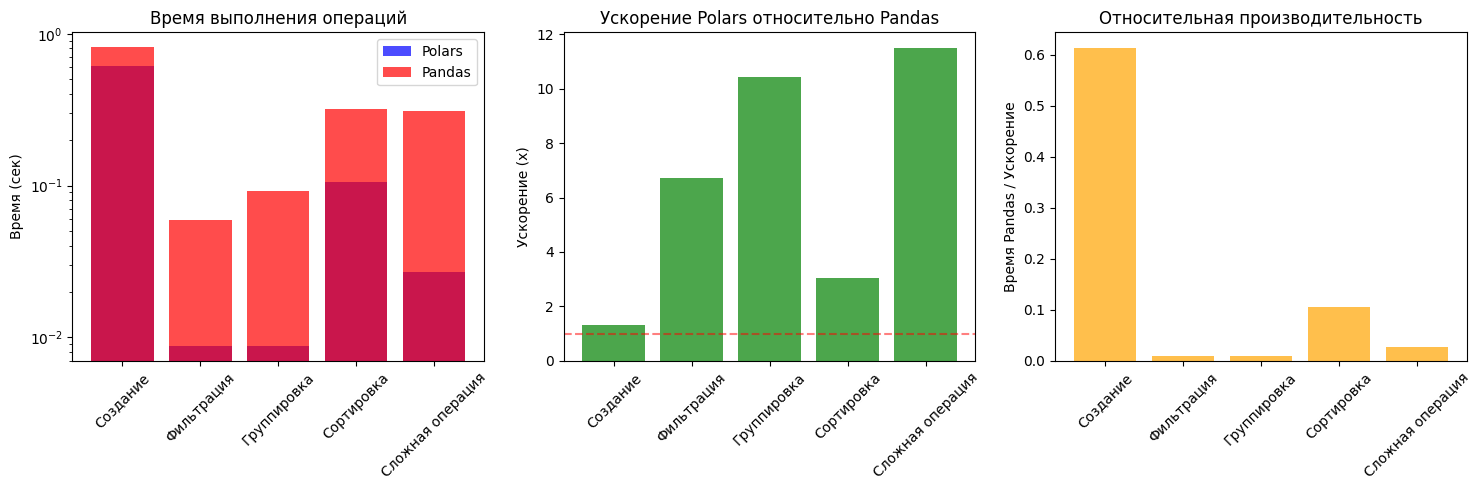

In [6]:
# 6. Сравнение производительности Polars vs Pandas

print("=== Сравнение производительности Polars vs Pandas ===")

# Создаем большой набор данных для тестирования
np.random.seed(42)
n_rows = 1_000_000
n_assets = 50

print(f"Создаем {n_rows:,} строк данных для {n_assets} активов...")

# Генерируем данные
large_data = []
for i in range(n_rows):
    large_data.append({
        'timestamp': pd.Timestamp('2024-01-01') + pd.Timedelta(seconds=i),
        'ticker': f'ASSET_{i % n_assets:02d}',
        'price': 100 + np.random.normal(0, 10),
        'volume': np.random.randint(1, 10000),
        'direction': np.random.choice([1, -1])
    })

print("Данные созданы. Теперь тестируем производительность...")

# Тест 1: Создание DataFrame
print("\n--- Тест 1: Создание DataFrame ---")

# Polars
start_time = time.time()
df_polars_large = pl.DataFrame(large_data)
polars_create_time = time.time() - start_time

# Pandas
start_time = time.time()
df_pandas_large = pd.DataFrame(large_data)
pandas_create_time = time.time() - start_time

print(f"Polars создание DataFrame: {polars_create_time:.4f} сек")
print(f"Pandas создание DataFrame: {pandas_create_time:.4f} сек")
print(f"Ускорение Polars: {pandas_create_time/polars_create_time:.2f}x")

# Тест 2: Фильтрация
print("\n--- Тест 2: Фильтрация ---")

# Polars
start_time = time.time()
filtered_polars = df_polars_large.filter(pl.col("volume") > 5000)
polars_filter_time = time.time() - start_time

# Pandas
start_time = time.time()
filtered_pandas = df_pandas_large[df_pandas_large["volume"] > 5000]
pandas_filter_time = time.time() - start_time

print(f"Polars фильтрация: {polars_filter_time:.4f} сек")
print(f"Pandas фильтрация: {pandas_filter_time:.4f} сек")
print(f"Ускорение Polars: {pandas_filter_time/polars_filter_time:.2f}x")

# Тест 3: Группировка и агрегация
print("\n--- Тест 3: Группировка и агрегация ---")

# Polars
start_time = time.time()
grouped_polars = (
    df_polars_large
    .group_by("ticker")
    .agg([
        pl.col("price").mean().alias("avg_price"),
        pl.col("volume").sum().alias("total_volume"),
        pl.col("volume").mean().alias("avg_volume"),
        pl.len().alias("count")
    ])
)
polars_group_time = time.time() - start_time

# Pandas
start_time = time.time()
grouped_pandas = (
    df_pandas_large
    .groupby("ticker")
    .agg({
        "price": "mean",
        "volume": ["sum", "mean", "count"]
    })
)
pandas_group_time = time.time() - start_time

print(f"Polars группировка: {polars_group_time:.4f} сек")
print(f"Pandas группировка: {pandas_group_time:.4f} сек")
print(f"Ускорение Polars: {pandas_group_time/polars_group_time:.2f}x")

# Тест 4: Сортировка
print("\n--- Тест 4: Сортировка ---")

# Polars
start_time = time.time()
sorted_polars = df_polars_large.sort(["ticker", "timestamp"])
polars_sort_time = time.time() - start_time

# Pandas
start_time = time.time()
sorted_pandas = df_pandas_large.sort_values(["ticker", "timestamp"])
pandas_sort_time = time.time() - start_time

print(f"Polars сортировка: {polars_sort_time:.4f} сек")
print(f"Pandas сортировка: {pandas_sort_time:.4f} сек")
print(f"Ускорение Polars: {pandas_sort_time/polars_sort_time:.2f}x")

# Тест 5: Сложная операция (аналогично анализу портфеля)
print("\n--- Тест 5: Сложная операция ---")

# Polars
start_time = time.time()
complex_polars = (
    df_polars_large
    .with_columns([
        (pl.col("price") * pl.col("volume")).alias("trade_value"),
        pl.col("timestamp").dt.date().alias("date")
    ])
    .group_by(["ticker", "date"])
    .agg([
        pl.col("trade_value").sum().alias("daily_value"),
        pl.col("volume").sum().alias("daily_volume"),
        pl.col("price").mean().alias("vwap")
    ])
    .sort(["ticker", "date"])
)
polars_complex_time = time.time() - start_time

# Pandas
start_time = time.time()
df_pandas_large["trade_value"] = df_pandas_large["price"] * df_pandas_large["volume"]
df_pandas_large["date"] = df_pandas_large["timestamp"].dt.date
complex_pandas = (
    df_pandas_large
    .groupby(["ticker", "date"])
    .agg({
        "trade_value": "sum",
        "volume": "sum", 
        "price": "mean"
    })
    .reset_index()
    .sort_values(["ticker", "date"])
)
pandas_complex_time = time.time() - start_time

print(f"Polars сложная операция: {polars_complex_time:.4f} сек")
print(f"Pandas сложная операция: {pandas_complex_time:.4f} сек")
print(f"Ускорение Polars: {pandas_complex_time/polars_complex_time:.2f}x")

# Итоговая таблица результатов
print("\n" + "="*60)
print("ИТОГОВОЕ СРАВНЕНИЕ ПРОИЗВОДИТЕЛЬНОСТИ")
print("="*60)
print(f"{'Операция':<20} {'Polars (сек)':<12} {'Pandas (сек)':<12} {'Ускорение':<10}")
print("-"*60)
print(f"{'Создание DataFrame':<20} {polars_create_time:<12.4f} {pandas_create_time:<12.4f} {pandas_create_time/polars_create_time:<10.2f}x")
print(f"{'Фильтрация':<20} {polars_filter_time:<12.4f} {pandas_filter_time:<12.4f} {pandas_filter_time/polars_filter_time:<10.2f}x")
print(f"{'Группировка':<20} {polars_group_time:<12.4f} {pandas_group_time:<12.4f} {pandas_group_time/polars_group_time:<10.2f}x")
print(f"{'Сортировка':<20} {polars_sort_time:<12.4f} {pandas_sort_time:<12.4f} {pandas_sort_time/polars_sort_time:<10.2f}x")
print(f"{'Сложная операция':<20} {polars_complex_time:<12.4f} {pandas_complex_time:<12.4f} {pandas_complex_time/polars_complex_time:<10.2f}x")
print("="*60)

# Визуализация результатов
operations = ['Создание', 'Фильтрация', 'Группировка', 'Сортировка', 'Сложная операция']
polars_times = [polars_create_time, polars_filter_time, polars_group_time, polars_sort_time, polars_complex_time]
pandas_times = [pandas_create_time, pandas_filter_time, pandas_group_time, pandas_sort_time, pandas_complex_time]
speedups = [pandas_create_time/polars_create_time, pandas_filter_time/polars_filter_time, 
           pandas_group_time/polars_group_time, pandas_sort_time/polars_sort_time, 
           pandas_complex_time/polars_complex_time]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(operations, polars_times, alpha=0.7, label='Polars', color='blue')
plt.bar(operations, pandas_times, alpha=0.7, label='Pandas', color='red')
plt.title('Время выполнения операций')
plt.ylabel('Время (сек)')
plt.xticks(rotation=45)
plt.legend()
plt.yscale('log')

plt.subplot(1, 3, 2)
plt.bar(operations, speedups, color='green', alpha=0.7)
plt.title('Ускорение Polars относительно Pandas')
plt.ylabel('Ускорение (x)')
plt.xticks(rotation=45)
plt.axhline(y=1, color='red', linestyle='--', alpha=0.5)

plt.subplot(1, 3, 3)
plt.bar(operations, [t/s for t, s in zip(pandas_times, speedups)], color='orange', alpha=0.7)
plt.title('Относительная производительность')
plt.ylabel('Время Pandas / Ускорение')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [7]:
# 7. Интеграция Polars с другими библиотеками

print("=== Интеграция Polars с другими библиотеками ===")

# Polars легко интегрируется с другими библиотеками Python
# Рассмотрим примеры интеграции с numpy, pandas, matplotlib и scikit-learn

# 1. Интеграция с NumPy
print("--- Интеграция с NumPy ---")

# Создаем данные
np.random.seed(42)
n_samples = 1000
features = np.random.randn(n_samples, 5)
target = np.random.randn(n_samples)

# Создаем Polars DataFrame из NumPy массивов
feature_names = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']
df_features = pl.DataFrame({
    name: features[:, i] for i, name in enumerate(feature_names)
})
df_features = df_features.with_columns(pl.Series("target", target))

print("Polars DataFrame с NumPy данными:")
print(df_features.head())

# Преобразование обратно в NumPy
features_back = df_features.select(pl.exclude("target")).to_numpy()
target_back = df_features.select("target").to_numpy().flatten()

print(f"Исходные данные: {features.shape}, {target.shape}")
print(f"Данные после преобразования: {features_back.shape}, {target_back.shape}")
print(f"Данные идентичны: {np.allclose(features, features_back)}")

# 2. Интеграция с Pandas
print("\n--- Интеграция с Pandas ---")

# Создаем Pandas DataFrame
pandas_df = pd.DataFrame({
    'date': pd.date_range('2024-01-01', periods=100, freq='D'),
    'price': 100 + np.cumsum(np.random.randn(100) * 0.1),
    'volume': np.random.randint(1000, 10000, 100)
})

print("Исходный Pandas DataFrame:")
print(pandas_df.head())

# Преобразуем в Polars
polars_from_pandas = pl.from_pandas(pandas_df)
print("\nPolars DataFrame из Pandas:")
print(polars_from_pandas.head())

# Обработка в Polars
processed_polars = (
    polars_from_pandas
    .with_columns([
        pl.col("price").pct_change().alias("returns"),
        pl.col("volume").rolling_mean(window_size=5).alias("volume_ma5")
    ])
    .filter(pl.col("returns").is_not_null())
)

print("\nОбработанные данные в Polars:")
print(processed_polars.head())

# Преобразуем обратно в Pandas
processed_pandas = processed_polars.to_pandas()
print("\nОбработанные данные обратно в Pandas:")
print(processed_pandas.head())

# 3. Интеграция с scikit-learn
print("\n--- Интеграция с scikit-learn ---")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Подготавливаем данные для машинного обучения
ml_data = (
    df_features
    .with_columns([
        # Создаем дополнительные признаки
        (pl.col("feature_1") * pl.col("feature_2")).alias("feature_interaction"),
        pl.col("feature_3").pow(2).alias("feature_3_squared"),
        pl.col("feature_4").log().alias("feature_4_log")
    ])
    .select(pl.exclude("target"))
)

# Преобразуем в NumPy для scikit-learn
X = ml_data.to_numpy()
y = target

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Метрики
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Модель обучена. MSE: {mse:.4f}, R²: {r2:.4f}")

# 4. Интеграция с matplotlib для визуализации
print("\n--- Интеграция с matplotlib ---")

# Создаем данные для визуализации
viz_data = (
    processed_polars
    .with_columns([
        pl.col("date").dt.day_of_year().alias("day_of_year"),
        pl.col("returns").abs().alias("abs_returns")
    ])
    .select(["day_of_year", "returns", "abs_returns", "volume"])
)

# Преобразуем в Pandas для удобства работы с matplotlib
viz_pandas = viz_data.to_pandas()

# Строим графики
plt.figure(figsize=(15, 10))

# График 1: Цены и объемы
plt.subplot(2, 3, 1)
plt.plot(processed_pandas['date'], processed_pandas['price'], label='Price', linewidth=2)
plt.title('Цены акций')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Доходности
plt.subplot(2, 3, 2)
plt.plot(processed_pandas['date'], processed_pandas['returns'], alpha=0.7)
plt.title('Дневные доходности')
plt.xlabel('Дата')
plt.ylabel('Доходность')
plt.grid(True, alpha=0.3)

# График 3: Распределение доходностей
plt.subplot(2, 3, 3)
plt.hist(processed_pandas['returns'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Распределение доходностей')
plt.xlabel('Доходность')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

# График 4: Объемы
plt.subplot(2, 3, 4)
plt.plot(processed_pandas['date'], processed_pandas['volume'], color='green', alpha=0.7)
plt.title('Объемы торгов')
plt.xlabel('Дата')
plt.ylabel('Объем')
plt.grid(True, alpha=0.3)

# График 5: Корреляция доходности и объема
plt.subplot(2, 3, 5)
plt.scatter(viz_pandas['volume'], viz_pandas['abs_returns'], alpha=0.6)
plt.title('Корреляция: Объем vs |Доходность|')
plt.xlabel('Объем')
plt.ylabel('|Доходность|')
plt.grid(True, alpha=0.3)

# График 6: Скользящее среднее объема
plt.subplot(2, 3, 6)
plt.plot(processed_pandas['date'], processed_pandas['volume'], alpha=0.5, label='Объем')
plt.plot(processed_pandas['date'], processed_pandas['volume_ma5'], label='MA5', linewidth=2)
plt.title('Объемы и скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Объем')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Заключение ===")
print("Polars отлично интегрируется с экосистемой Python:")
print("• Легко конвертируется в/из NumPy и Pandas")
print("• Совместим с scikit-learn для машинного обучения")
print("• Поддерживает все стандартные операции визуализации")
print("• Сохраняет высокую производительность при интеграции")
print("• Идеально подходит для обработки больших финансовых данных")


=== Интеграция Polars с другими библиотеками ===
--- Интеграция с NumPy ---
Polars DataFrame с NumPy данными:
shape: (5, 6)
┌───────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ feature_1 ┆ feature_2 ┆ feature_3 ┆ feature_4 ┆ feature_5 ┆ target    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.496714  ┆ -0.138264 ┆ 0.647689  ┆ 1.52303   ┆ -0.234153 ┆ -0.42376  │
│ -0.234137 ┆ 1.579213  ┆ 0.767435  ┆ -0.469474 ┆ 0.54256   ┆ -0.453414 │
│ -0.463418 ┆ -0.46573  ┆ 0.241962  ┆ -1.91328  ┆ -1.724918 ┆ -1.795643 │
│ -0.562288 ┆ -1.012831 ┆ 0.314247  ┆ -0.908024 ┆ -1.412304 ┆ -0.33009  │
│ 1.465649  ┆ -0.225776 ┆ 0.067528  ┆ -1.424748 ┆ -0.544383 ┆ 0.732829  │
└───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
Исходные данные: (1000, 5), (1000,)
Данные после преобразовани

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values